In [21]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
data = pd.read_pickle("solar_clean.pickle")

In [23]:
data = data.rename(columns={'brand_bucketed': 'brand',
                            'panel_type_bucketed': 'panel_type',
                            'region_bucketed': 'region',
                            })

In [24]:
# efficiency = power/dimension so drop the 2 columns power, dimension
data.drop(['power_wp', 'dimension_sqm'], axis=1, inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262 entries, 9 to 2283
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   efficiency_percent  1217 non-null   float64
 1   weight_kg           1197 non-null   float64
 2   price_euro          1261 non-null   float64
 3   brand               1262 non-null   object 
 4   panel_type          1262 non-null   object 
 5   region              1262 non-null   object 
dtypes: float64(3), object(3)
memory usage: 69.0+ KB


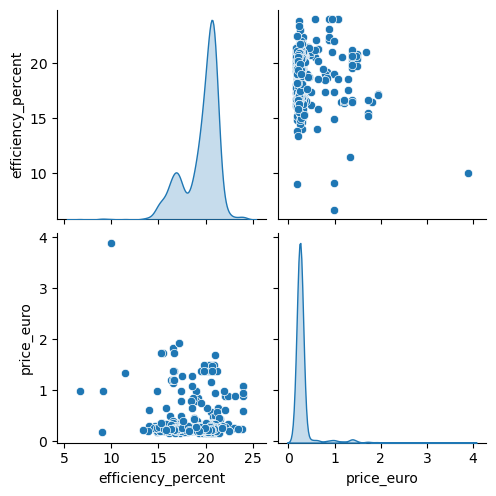

In [67]:
pairplot = sns.pairplot(data[['efficiency_percent', 'price_euro']], diag_kind = 'kde')

In [72]:
# check NA's in numeric data

numeric = data[['efficiency_percent', 'price_euro', 'weight_kg', 'region', 'panel_type']]

for col in numeric.columns:
    print(f"NA's for {col}: {np.round(numeric[col].isna().sum()/len(data)*100, 2)}%")

NA's for efficiency_percent: 3.57%
NA's for price_euro: 0.08%
NA's for weight_kg: 5.15%
NA's for region: 0.0%
NA's for panel_type: 0.0%


<AxesSubplot:xlabel='price_euro'>

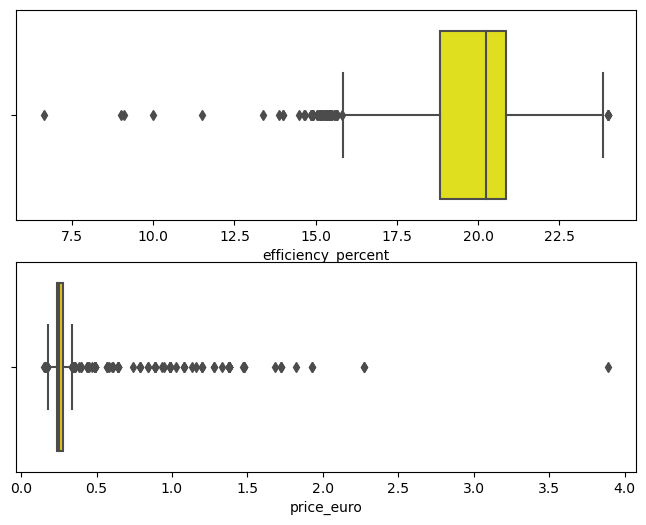

In [73]:
# plot distribution 

fig, axs = plt.subplots(2, figsize = (8,6))

sns.boxplot(ax=axs[0], x = 'efficiency_percent', data = data, color = 'yellow')
sns.boxplot(ax=axs[1], x = 'price_euro', data = data, color = 'gold')

In [28]:
# drop NA's before modeling
data_clean = data.dropna()

# Fit Linear Regression

- we use the linear model price ~ efficiency+brand+panel_type
- NB: when using the dataset df_clean the model score is -0.072 (??) something is wrong w the newly scraped data but I don't see what

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#check what type the NA's are (for SimpleImputer)
#df[df['efficiency_percent'].isna()]
#type(df.iloc[19, 1])

In [ ]:
# the SimpleImputer doesn't work in the pipeline
# we therefore drop all NA's first 

#num_pipeline = Pipeline([
#    ('impute', SimpleImputer(missing_values = np.float64, strategy='median')), 
#    ('standardize', StandardScaler())
#])

#cat_pipeline = Pipeline([
#    ('ohe', OneHotEncoder(drop='first'))
#])

In [54]:
X = data_clean[['efficiency_percent', 'brand', 'panel_type']]
y = data_clean['price_euro']

In [55]:
num_pipeline = Pipeline([
    ('standardize', StandardScaler())
])

cat_pipeline = Pipeline([
    ('ohe', OneHotEncoder(drop='first'))
])

In [56]:
cat_cols = list(X.drop(['efficiency_percent'], axis=1))
num_cols = ['efficiency_percent']

In [58]:
full_pipeline = ColumnTransformer(
    [('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)],
    remainder='passthrough')

In [13]:
X_prepped = full_pipeline.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_prepped, y, test_size=.2, random_state=11)

In [15]:
lr = LinearRegression()
lr_fitted = lr.fit(X_train, y_train)

In [16]:
lr.score(X_test, y_test)

0.6450226660384346

In [60]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Fit Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [180]:
# create new X, y

In [29]:
data_clean.columns

Index(['efficiency_percent', 'weight_kg', 'price_euro', 'brand', 'panel_type',
       'region'],
      dtype='object')

In [30]:
# efficiency = power/dimension therefore we drop the latter 2

X = data_clean.drop(['price_euro'], axis=1)
y = data_clean['price_euro']

In [31]:
X.columns

Index(['efficiency_percent', 'weight_kg', 'brand', 'panel_type', 'region'], dtype='object')

In [32]:
X_cat = list(X.drop(['efficiency_percent', 'weight_kg'], axis=1))

In [33]:
# no scaling needed
pipeline_ohe = ColumnTransformer([("cat", OneHotEncoder(drop='first'), X_cat)],
                                 remainder='passthrough'
                                )

In [34]:
X_prepped = pipeline_ohe.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_prepped, y,
                                                    test_size=.2,
                                                    random_state=41)

In [36]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

In [38]:
# alternatively (for streamlit cache) write it into a function:
def fit_model(model, X, y):
    model = model
    model_fitted = model.fit(X,y)
    return model_fitted

In [43]:
fitted = fit_model(rfr, X_train, y_train)

In [44]:
fitted.predict(X_test)

array([0.2157    , 0.28832   , 0.30261   , 0.24691   , 0.2699    ,
       0.2860675 , 0.32159   , 0.16624   , 0.229742  , 0.2642875 ,
       0.22855   , 0.31601333, 0.24283   , 0.23919667, 0.27215   ,
       0.246601  , 0.24479   , 0.30605   , 0.24743417, 0.27228   ,
       0.2631    , 0.27692   , 0.20639   , 0.29132   , 0.3825    ,
       0.231432  , 0.21494   , 0.21342   , 0.19531   , 0.25002333,
       0.27835667, 0.218     , 0.25405   , 0.19255   , 0.24173   ,
       0.2324585 , 0.23904   , 0.30814   , 0.17932   , 0.163     ,
       1.361     , 0.21423   , 1.4179    , 0.32001   , 0.24995333,
       0.230152  , 0.24061167, 0.2672    , 0.2715    , 0.245395  ,
       0.25577   , 0.163     , 0.24827786, 0.25148   , 0.2895    ,
       1.3975    , 0.25278167, 0.26043   , 0.25322286, 0.2558    ,
       0.2662    , 0.24251   , 0.244646  , 0.26921   , 0.24703667,
       0.24223   , 0.28022   , 0.24085   , 0.287715  , 0.29117   ,
       0.27228   , 0.31527   , 0.22007   , 0.23676   , 0.25264

In [37]:
rfr.score(X_test, y_test)

0.901129166135575